# 1 Neural Networks using Numpy [14 pts.]

## 1.1 Helper Functions [4 pts]

1. ReLU(): This function will accept one argument and return Numpy array with the ReLU
activation and the equation is given below. [0.5 pt]
ReLU(x) = max(x, 0)
2. softmax(): This function will accept one argument and return a Numpy array with the
softmax activations of each of the inputs and the equation is shown below. [0.5 pt]
3. compute(): This function will accept 3 arguments: a weight, an input, and a bias matrix
and return the product between the weights and input, plus the biases (i.e. a prediction for
a given layer). [0.5 pt]



In [117]:
import numpy as np
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import time
import os
import math
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

# Load the data
def loadData():
    with np.load("notMNIST.npz") as data:
        Data, Target = data["images"], data["labels"]
        np.random.seed(521)
        randIndx = np.arange(len(Data))
        np.random.shuffle(randIndx)
        Data = Data[randIndx] / 255.0
        Target = Target[randIndx]
        trainData, trainTarget = Data[:10000], Target[:10000]
        validData, validTarget = Data[10000:16000], Target[10000:16000]
        testData, testTarget = Data[16000:], Target[16000:]
    return trainData, validData, testData, trainTarget, validTarget, testTarget

# Implementation of a neural network using only Numpy - trained using gradient descent with momentum
def convertOneHot(trainTarget, validTarget, testTarget):
    newtrain = np.zeros((trainTarget.shape[0], 10))
    newvalid = np.zeros((validTarget.shape[0], 10))
    newtest = np.zeros((testTarget.shape[0], 10))

    for item in range(0, trainTarget.shape[0]):
        newtrain[item][trainTarget[item]] = 1
    for item in range(0, validTarget.shape[0]):
        newvalid[item][validTarget[item]] = 1
    for item in range(0, testTarget.shape[0]):
        newtest[item][testTarget[item]] = 1
    return newtrain, newvalid, newtest


def shuffle(trainData, trainTarget):
    np.random.seed(421)
    randIndx = np.arange(len(trainData))
    target = trainTarget
    np.random.shuffle(randIndx)
    data, target = trainData[randIndx], target[randIndx]
    return data, target

In [132]:
trainData, validData, testData, trainTarget, validTarget, testTarget = loadData()
trainTarget, validTarget, testTarget = convertOneHot(trainTarget, validTarget, testTarget)
trainData,trainTarget = shuffle(trainData, trainTarget)
print(trainData.shape)
print(trainTarget[1])

(10000, 28, 28)
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [119]:
def ReLu(x):
#     x[x<0] = 0
#     print("relu")
    return np.where(x<0, 0, x)

In [120]:
def gradReLu(x):
#     x[x>0] = 1
#     x[x<=0] = 0
    return np.where(x<=0, 0, 1)

In [235]:
def softmax(x):
    assert math.isnan(np.sum(np.exp(x))) == False 
    assert np.sum(np.exp(x)) != 0
    
    axis = 1
    ax_sum = np.expand_dims(np.sum(np.exp(x), axis = axis), axis)
    return np.exp(x)/ax_sum

In [237]:
def compute(X, W, b):
    return np.matmul(X, W) + b

In [238]:
def averageCE(target, prediction):
#     print(np.log(prediction))
    total = (np.multiply(target, np.log(prediction))).sum()
#     print(total)
    avg = -1*total /target.shape[0]
#     print(avg)
    return avg

In [239]:
def gradCE(target, prediction):
    total = np.sum(target * 1/prediction)
    assert(len(target) == predictions.shape[0])
#     print(total)
    gradCE = total * (-1/len(target))
    return gradCE

In [240]:
def gradSoftmax(s):
    s = softmax(s).reshape(-1, 1)
    return np.diagflat(s) - np.dot(s, np.transpose(s))

## 1.2 Backpropagation Derivation [4 pts.]
To train the neural network, you will need to implement the backpropagation algorithm. For the
neural network architecture outlined in the assignment description, derive the following analytical
expressions and include them in your report:

In [280]:
class myNN():
    def __init__(self, num_hidden):
        super(myNN, self).__init__()
        
        n_x = 784 # size of input layer`
        self.k = num_hidden
        n_y = 10 # size of output layer
        
        #initialize parameters
        self.W1 = np.random.randn(n_x, self.k) * (2 / (n_x + self.k))**(1/2.0) #Wh
        self.b1 = np.zeros(shape=(1,self.k))
        self.W2 = np.random.randn(self.k,n_y) * (2 / (self.k + n_y))**(1/2.0) #Wo
        self.b2 = np.zeros(shape=(1,n_y))
        
        #initialize hidden units and signals
#         self.X0 = np.zeros(shape=(,n_x))
#         self.X1 = np.zeros(shape=(,k))
#         self.X2 = np.zeros(shape=(,n_y))
#         self.S1 = np.zeros(shape=(,k))
#         self.S2 = np.zeros(shape=(,n_y))
        
        #for back propagation
        self.V1_w = np.full((n_x, self.k), 1e-5)
        self.V2_w = np.full((self.k, n_y), 1e-5)
        self.V1_b = np.full((1, self.k), 1e-5)
        self.V2_b = np.full((1, n_y), 1e-5)
        self.gamma = 0.9
        self.alpha = 0.1
        
    def forward(self, img):
        self.X0 = img
#         print("forward pass S1 ", self.S1.shape)
#         print("forward pass W1 ", self.W1.shape)
#         print("forward pass b1 ", self.b1.shape)
        self.S1 = compute(self.X0, self.W1, self.b1)

        self.X1 = ReLu(self.S1)
#         print("forward pass X1 ", self.X1.shape)        
        self.S2 = compute(self.X1, self.W2, self.b2)
#         print("forward pass S2 ", self.S2.shape)
#         print("                              ", self.S2)
        self.X2 = softmax(self.S2)
#         print("forward pass X2 ", self.X2.shape)
#         print("forward")
        return self.X2
    
    def backward(self, target):
        N = target.shape[0]
        delta2 = np.subtract(softmax(self.S2), target)   
        delta1 = np.multiply(np.matmul(delta2, self.W2.T), gradReLu(self.S1))
        
        d_W2 = np.matmul(self.X1.T,delta2)/N #k * 10
        d_b2 = delta2.sum(axis = 0)/N #1 * 10
        d_b2 = np.reshape(d_b2, (1, 10))
        d_W1 = np.matmul(self.X0.T,delta1)/N #784 * k
        d_b1 = delta1.sum(axis = 0)/N #1 * k
        d_b1 = np.reshape(d_b1, (1, self.k))        
        
        self.V2_w = self.gamma * self.V2_w + self.alpha * d_W2
        self.V2_b = self.gamma * self.V2_b + self.alpha * d_b2
        
        self.V1_w = self.gamma * self.V1_w + self.alpha * d_W1
        self.V1_b = self.gamma * self.V1_b + self.alpha * d_b1
        
        
        return 
    
    def update(self):
        lr = 1
        self.W1 = self.W1 - lr * self.V1_w
        self.b1 = self.b1 - lr * self.V1_b
        self.W2 = self.W2 - lr * self.V2_w
        self.b2 = self.b2 - lr * self.V2_b
        return

In [262]:
def get_accuracy(model, data, target):
    correct = 0
    total = 0
    N = data.shape[0]
    labels = np.reshape(target, (N, 10))
    images = np.reshape(data, (N, 784))
    output = model.forward(images)
    pred = np.argmax(output, axis=1)
    label = np.argmax(labels, axis=1)
    correct += (np.sum(pred == label))
    total += pred.shape[0]
    return correct / total

In [274]:
def train(model,trainData, validData, testData, trainTarget, validTarget, testTarget, num_epochs = 10):
    # initialize all the weights
    losses, valid_losses, test_losses, train_acc, valid_acc, test_acc = [], [], [], [], [], []
    epochs = []
    
    assert trainData.shape[0] == 10000
    assert validData.shape[0] == 6000

    
    N_train = trainData.shape[0]
    N_valid = validData.shape[0]
    N_test = testData.shape[0]

    print(trainData.shape[0], validData.shape[0])
    
    train_labels = np.reshape(trainTarget, (N_train, 10))
    train_images = np.reshape(trainData, (N_train, 784))
    
    valid_images = np.reshape(validData, (N_valid, 784))
    valid_labels = np.reshape(validTarget, (N_valid, 10))
    
    test_images = np.reshape(testData, (N_test, 784))
    test_labels = np.reshape(testTarget, (N_test, 10))
    
    for epoch in range(num_epochs):
        train_loss = 0
        
        pred = model.forward(train_images)
        loss = averageCE(train_labels, pred)
        
        train_loss += loss
        model.backward(train_labels)
        model.update()
        losses.append(float(train_loss))
    
        valid_loss = 0
        pred = model.forward(valid_images)
        valid_loss += averageCE(valid_labels, pred)
        valid_losses.append(float(valid_loss)) 

        test_loss = 0
        pred = model.forward(test_images)
        test_loss += averageCE(test_labels, pred)
        test_losses.append(float(test_loss)) 

        epochs.append(epoch)
        train_acc.append(get_accuracy(model, trainData, trainTarget))
        valid_acc.append(get_accuracy(model, validData, validTarget))
        test_acc.append(get_accuracy(model, testData, testTarget))

        print("Epoch %d; Loss %f; Train Acc %f; Val Acc %f; Test Acc %f" % (
              epoch+1, loss, train_acc[-1], valid_acc[-1], test_acc[-1]))
        
     # plotting
    plt.title("Training Curves")
    plt.plot(epochs, losses, label="Train")
    plt.plot(epochs, valid_losses, label="Validation")
    plt.plot(epochs, test_losses, label="Test")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.legend(loc='best')
    plt.show()

    plt.title("Accuracy Curves")
    plt.plot(epochs, train_acc, label="Train")
    plt.plot(epochs, valid_acc, label="Validation")
    plt.plot(epochs, test_acc, label="Test")
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.legend(loc='best')
    plt.show()

10000 6000
Epoch 1; Loss 2.389595; Train Acc 0.221900; Val Acc 0.219167; Test Acc 0.212922
Epoch 2; Loss 2.077852; Train Acc 0.610600; Val Acc 0.611167; Test Acc 0.612702
Epoch 3; Loss 1.548079; Train Acc 0.684500; Val Acc 0.666167; Test Acc 0.701542
Epoch 4; Loss 1.155736; Train Acc 0.782400; Val Acc 0.770500; Test Acc 0.789280
Epoch 5; Loss 0.853184; Train Acc 0.792000; Val Acc 0.789667; Test Acc 0.793319
Epoch 6; Loss 0.767900; Train Acc 0.833200; Val Acc 0.832833; Test Acc 0.839941
Epoch 7; Loss 0.630551; Train Acc 0.809800; Val Acc 0.807667; Test Acc 0.821586
Epoch 8; Loss 0.665042; Train Acc 0.842500; Val Acc 0.845833; Test Acc 0.856828
Epoch 9; Loss 0.565073; Train Acc 0.853900; Val Acc 0.853167; Test Acc 0.864905
Epoch 10; Loss 0.549767; Train Acc 0.854600; Val Acc 0.851333; Test Acc 0.861968
Epoch 11; Loss 0.558851; Train Acc 0.857000; Val Acc 0.855000; Test Acc 0.864537
Epoch 12; Loss 0.545493; Train Acc 0.865800; Val Acc 0.859500; Test Acc 0.870411
Epoch 13; Loss 0.513491; T

Epoch 103; Loss 0.203895; Train Acc 0.944800; Val Acc 0.906667; Test Acc 0.911894
Epoch 104; Loss 0.202618; Train Acc 0.945200; Val Acc 0.906667; Test Acc 0.911894
Epoch 105; Loss 0.201350; Train Acc 0.945400; Val Acc 0.906833; Test Acc 0.912261
Epoch 106; Loss 0.200090; Train Acc 0.945700; Val Acc 0.907000; Test Acc 0.912261
Epoch 107; Loss 0.198841; Train Acc 0.946200; Val Acc 0.907167; Test Acc 0.912261
Epoch 108; Loss 0.197600; Train Acc 0.946500; Val Acc 0.907000; Test Acc 0.911894
Epoch 109; Loss 0.196367; Train Acc 0.946900; Val Acc 0.907167; Test Acc 0.912261
Epoch 110; Loss 0.195142; Train Acc 0.947200; Val Acc 0.907333; Test Acc 0.912261
Epoch 111; Loss 0.193923; Train Acc 0.947700; Val Acc 0.907333; Test Acc 0.912628
Epoch 112; Loss 0.192711; Train Acc 0.948400; Val Acc 0.907333; Test Acc 0.912261
Epoch 113; Loss 0.191510; Train Acc 0.948600; Val Acc 0.907333; Test Acc 0.911527
Epoch 114; Loss 0.190315; Train Acc 0.949000; Val Acc 0.907333; Test Acc 0.911527
Epoch 115; Loss 

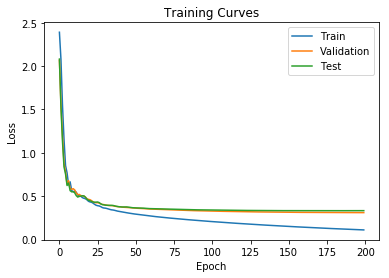

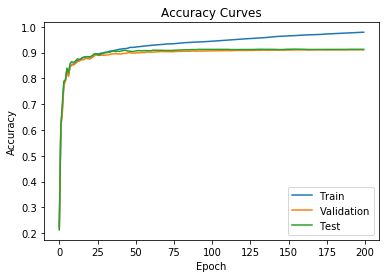

In [275]:
model1 = myNN(1000)
train(model1,trainData, validData, testData, trainTarget, validTarget, testTarget, num_epochs = 200)


In [269]:
# lr = 0.5
model1 = myNN(1000)
train(model1,trainData, validData, testData, trainTarget, validTarget, testTarget, num_epochs = 200)


10000 6000
Epoch 1; Loss 2.490858; Train Acc 0.194300; Val Acc 0.191333; Test Acc 0.193098
Epoch 2; Loss 2.181463; Train Acc 0.383000; Val Acc 0.378000; Test Acc 0.386931
Epoch 3; Loss 1.908619; Train Acc 0.647300; Val Acc 0.643167; Test Acc 0.651615
Epoch 4; Loss 1.490892; Train Acc 0.776000; Val Acc 0.771833; Test Acc 0.782673
Epoch 5; Loss 1.158055; Train Acc 0.752300; Val Acc 0.748500; Test Acc 0.762115
Epoch 6; Loss 0.978997; Train Acc 0.827300; Val Acc 0.825667; Test Acc 0.831131
Epoch 7; Loss 0.805449; Train Acc 0.835800; Val Acc 0.835000; Test Acc 0.839941
Epoch 8; Loss 0.703271; Train Acc 0.828900; Val Acc 0.825500; Test Acc 0.834802
Epoch 9; Loss 0.657897; Train Acc 0.840200; Val Acc 0.838000; Test Acc 0.850587
Epoch 10; Loss 0.603818; Train Acc 0.849700; Val Acc 0.848167; Test Acc 0.861968
Epoch 11; Loss 0.568123; Train Acc 0.850400; Val Acc 0.850500; Test Acc 0.858297
Epoch 12; Loss 0.557605; Train Acc 0.857200; Val Acc 0.857500; Test Acc 0.866006
Epoch 13; Loss 0.536427; T

KeyboardInterrupt: 

## 1.4 Hyperparameter Investigation [4 pts.]

#### 1. Number of hidden units: Instead of using 1000 units, investigate the classification accuracy of neural networks with [100, 500, 2000] units. For each scenario report the test accuracy and summarize your observation about the effect on the number of hidden units. [2 pts.]



10000 6000
Epoch 1; Loss 2.487074; Train Acc 0.202100; Val Acc 0.196000; Test Acc 0.207783
Epoch 2; Loss 2.165662; Train Acc 0.394800; Val Acc 0.393500; Test Acc 0.395374
Epoch 3; Loss 1.879757; Train Acc 0.633800; Val Acc 0.624000; Test Acc 0.641336
Epoch 4; Loss 1.476706; Train Acc 0.696600; Val Acc 0.684833; Test Acc 0.701175
Epoch 5; Loss 1.209436; Train Acc 0.763900; Val Acc 0.748333; Test Acc 0.774229
Epoch 6; Loss 0.955270; Train Acc 0.788800; Val Acc 0.776500; Test Acc 0.791116
Epoch 7; Loss 0.825952; Train Acc 0.822800; Val Acc 0.819333; Test Acc 0.830764
Epoch 8; Loss 0.697626; Train Acc 0.806900; Val Acc 0.801000; Test Acc 0.818649
Epoch 9; Loss 0.666183; Train Acc 0.844900; Val Acc 0.840667; Test Acc 0.853157
Epoch 10; Loss 0.587283; Train Acc 0.845400; Val Acc 0.841167; Test Acc 0.850954
Epoch 11; Loss 0.577186; Train Acc 0.854500; Val Acc 0.849667; Test Acc 0.860866
Epoch 12; Loss 0.550392; Train Acc 0.857100; Val Acc 0.848167; Test Acc 0.861601
Epoch 13; Loss 0.547127; T

Epoch 103; Loss 0.254982; Train Acc 0.928400; Val Acc 0.901167; Test Acc 0.899413
Epoch 104; Loss 0.253864; Train Acc 0.929000; Val Acc 0.900833; Test Acc 0.899413
Epoch 105; Loss 0.252756; Train Acc 0.929300; Val Acc 0.901000; Test Acc 0.899413
Epoch 106; Loss 0.251656; Train Acc 0.929800; Val Acc 0.900833; Test Acc 0.899780
Epoch 107; Loss 0.250567; Train Acc 0.930200; Val Acc 0.901167; Test Acc 0.900147
Epoch 108; Loss 0.249488; Train Acc 0.930600; Val Acc 0.901167; Test Acc 0.899780
Epoch 109; Loss 0.248416; Train Acc 0.931100; Val Acc 0.901167; Test Acc 0.899413
Epoch 110; Loss 0.247351; Train Acc 0.931300; Val Acc 0.901167; Test Acc 0.899413
Epoch 111; Loss 0.246290; Train Acc 0.931700; Val Acc 0.901333; Test Acc 0.900147
Epoch 112; Loss 0.245231; Train Acc 0.932000; Val Acc 0.901667; Test Acc 0.900147
Epoch 113; Loss 0.244179; Train Acc 0.932200; Val Acc 0.901833; Test Acc 0.900147
Epoch 114; Loss 0.243132; Train Acc 0.932600; Val Acc 0.901667; Test Acc 0.900147
Epoch 115; Loss 

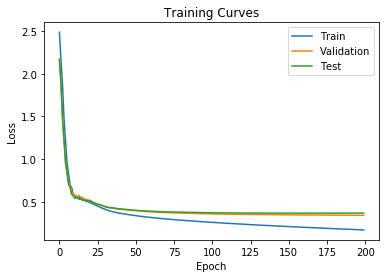

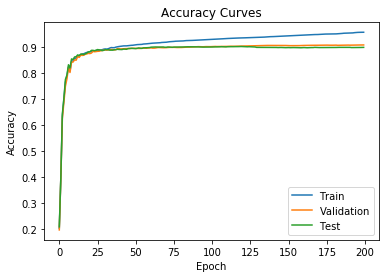

In [276]:
#lr = 1
model1 = myNN(100)
train(model1,trainData, validData, testData, trainTarget, validTarget, testTarget, num_epochs = 200)


10000 6000
Epoch 1; Loss 2.720312; Train Acc 0.229600; Val Acc 0.217667; Test Acc 0.225404
Epoch 2; Loss 2.407382; Train Acc 0.567800; Val Acc 0.550167; Test Acc 0.560940
Epoch 3; Loss 2.134526; Train Acc 0.678600; Val Acc 0.671000; Test Acc 0.674009
Epoch 4; Loss 1.772923; Train Acc 0.713700; Val Acc 0.698833; Test Acc 0.725771
Epoch 5; Loss 1.290694; Train Acc 0.775000; Val Acc 0.768500; Test Acc 0.792952
Epoch 6; Loss 0.856596; Train Acc 0.742200; Val Acc 0.733833; Test Acc 0.752203
Epoch 7; Loss 0.811287; Train Acc 0.726000; Val Acc 0.717500; Test Acc 0.741924
Epoch 8; Loss 0.785312; Train Acc 0.810000; Val Acc 0.798333; Test Acc 0.823789
Epoch 9; Loss 0.636940; Train Acc 0.784300; Val Acc 0.766000; Test Acc 0.791116
Epoch 10; Loss 0.719556; Train Acc 0.798700; Val Acc 0.793167; Test Acc 0.808737
Epoch 11; Loss 0.679194; Train Acc 0.836800; Val Acc 0.837500; Test Acc 0.843245
Epoch 12; Loss 0.588630; Train Acc 0.838800; Val Acc 0.838333; Test Acc 0.844714
Epoch 13; Loss 0.557916; T

Epoch 103; Loss 0.210028; Train Acc 0.942000; Val Acc 0.908667; Test Acc 0.904919
Epoch 104; Loss 0.208808; Train Acc 0.942400; Val Acc 0.909000; Test Acc 0.904919
Epoch 105; Loss 0.207598; Train Acc 0.942700; Val Acc 0.909167; Test Acc 0.904552
Epoch 106; Loss 0.206396; Train Acc 0.942800; Val Acc 0.909667; Test Acc 0.904919
Epoch 107; Loss 0.205201; Train Acc 0.943100; Val Acc 0.909667; Test Acc 0.905286
Epoch 108; Loss 0.204015; Train Acc 0.943700; Val Acc 0.910000; Test Acc 0.904919
Epoch 109; Loss 0.202836; Train Acc 0.944100; Val Acc 0.910167; Test Acc 0.905286
Epoch 110; Loss 0.201665; Train Acc 0.944300; Val Acc 0.910333; Test Acc 0.905286
Epoch 111; Loss 0.200503; Train Acc 0.944600; Val Acc 0.910167; Test Acc 0.905286
Epoch 112; Loss 0.199349; Train Acc 0.945100; Val Acc 0.910333; Test Acc 0.905653
Epoch 113; Loss 0.198204; Train Acc 0.945600; Val Acc 0.910500; Test Acc 0.906388
Epoch 114; Loss 0.197066; Train Acc 0.945900; Val Acc 0.910500; Test Acc 0.906021
Epoch 115; Loss 

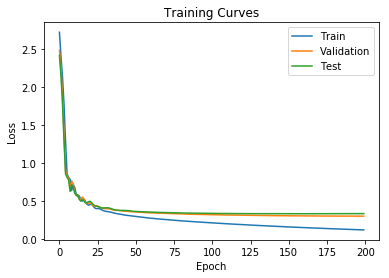

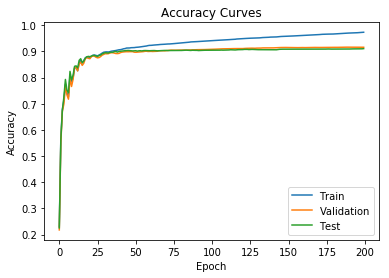

In [277]:
model1 = myNN(500)
train(model1,trainData, validData, testData, trainTarget, validTarget, testTarget, num_epochs = 200)


10000 6000
Epoch 1; Loss 2.385222; Train Acc 0.325600; Val Acc 0.326667; Test Acc 0.332966
Epoch 2; Loss 1.993055; Train Acc 0.690200; Val Acc 0.681667; Test Acc 0.691630
Epoch 3; Loss 1.372393; Train Acc 0.788700; Val Acc 0.780500; Test Acc 0.789280
Epoch 4; Loss 1.013004; Train Acc 0.829500; Val Acc 0.826167; Test Acc 0.838840
Epoch 5; Loss 0.742684; Train Acc 0.841600; Val Acc 0.839333; Test Acc 0.855727
Epoch 6; Loss 0.633076; Train Acc 0.846300; Val Acc 0.845667; Test Acc 0.859031
Epoch 7; Loss 0.591074; Train Acc 0.856500; Val Acc 0.854000; Test Acc 0.864537
Epoch 8; Loss 0.546083; Train Acc 0.857600; Val Acc 0.859333; Test Acc 0.864905
Epoch 9; Loss 0.524851; Train Acc 0.859000; Val Acc 0.859333; Test Acc 0.866373
Epoch 10; Loss 0.525762; Train Acc 0.866800; Val Acc 0.862167; Test Acc 0.869310
Epoch 11; Loss 0.516452; Train Acc 0.870700; Val Acc 0.864000; Test Acc 0.875184
Epoch 12; Loss 0.503959; Train Acc 0.873800; Val Acc 0.867500; Test Acc 0.879589
Epoch 13; Loss 0.500540; T

Epoch 103; Loss 0.200461; Train Acc 0.947000; Val Acc 0.905833; Test Acc 0.911894
Epoch 104; Loss 0.199136; Train Acc 0.947300; Val Acc 0.905833; Test Acc 0.912261
Epoch 105; Loss 0.197819; Train Acc 0.947500; Val Acc 0.906167; Test Acc 0.912261
Epoch 106; Loss 0.196512; Train Acc 0.947700; Val Acc 0.906167; Test Acc 0.912261
Epoch 107; Loss 0.195215; Train Acc 0.948200; Val Acc 0.906333; Test Acc 0.912261
Epoch 108; Loss 0.193927; Train Acc 0.948600; Val Acc 0.906167; Test Acc 0.912996
Epoch 109; Loss 0.192648; Train Acc 0.949200; Val Acc 0.905667; Test Acc 0.912628
Epoch 110; Loss 0.191377; Train Acc 0.949300; Val Acc 0.905833; Test Acc 0.912628
Epoch 111; Loss 0.190116; Train Acc 0.949900; Val Acc 0.905667; Test Acc 0.912628
Epoch 112; Loss 0.188862; Train Acc 0.950500; Val Acc 0.905833; Test Acc 0.912261
Epoch 113; Loss 0.187617; Train Acc 0.951000; Val Acc 0.906000; Test Acc 0.912261
Epoch 114; Loss 0.186381; Train Acc 0.951000; Val Acc 0.906167; Test Acc 0.912261
Epoch 115; Loss 

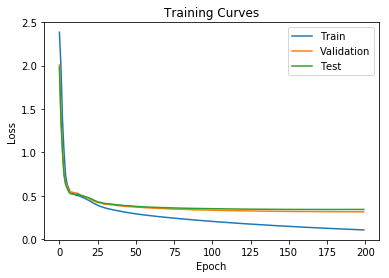

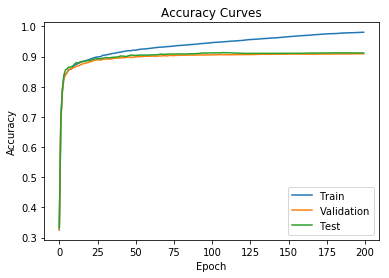

In [278]:
model1 = myNN(2000)
train(model1,trainData, validData, testData, trainTarget, validTarget, testTarget, num_epochs = 200)


#### 2. Early stopping: This technique is one of the simplest methods to control overfitting in neural networks. From the plots from Section 1.3, identify the early stopping point and report on the training, validation and test classification accuracies. [2 pts.]

10000 6000
Epoch 1; Loss 2.366400; Train Acc 0.386800; Val Acc 0.378833; Test Acc 0.383260
Epoch 2; Loss 1.978987; Train Acc 0.668300; Val Acc 0.664500; Test Acc 0.653451
Epoch 3; Loss 1.432047; Train Acc 0.756300; Val Acc 0.751667; Test Acc 0.765419
Epoch 4; Loss 1.028447; Train Acc 0.805500; Val Acc 0.805167; Test Acc 0.812041
Epoch 5; Loss 0.820810; Train Acc 0.835700; Val Acc 0.834500; Test Acc 0.841777
Epoch 6; Loss 0.657169; Train Acc 0.837400; Val Acc 0.831833; Test Acc 0.841410
Epoch 7; Loss 0.608341; Train Acc 0.846000; Val Acc 0.842833; Test Acc 0.852056
Epoch 8; Loss 0.561572; Train Acc 0.855000; Val Acc 0.852000; Test Acc 0.862702
Epoch 9; Loss 0.535040; Train Acc 0.863600; Val Acc 0.861833; Test Acc 0.870778
Epoch 10; Loss 0.520231; Train Acc 0.864800; Val Acc 0.861500; Test Acc 0.871145
Epoch 11; Loss 0.519573; Train Acc 0.868400; Val Acc 0.865167; Test Acc 0.872614
Epoch 12; Loss 0.505687; Train Acc 0.871500; Val Acc 0.866500; Test Acc 0.874082
Epoch 13; Loss 0.499728; T

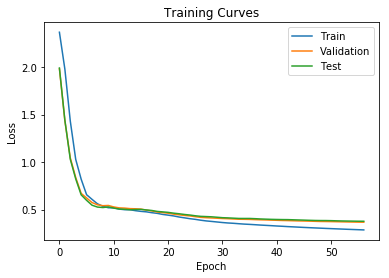

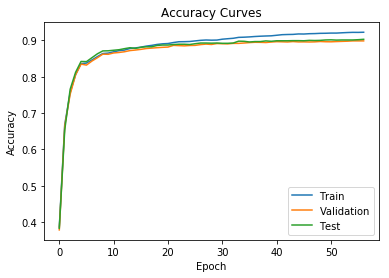

In [279]:
model1 = myNN(1000)
train(model1,trainData, validData, testData, trainTarget, validTarget, testTarget, num_epochs = 57)


# Neural Networks in Tensorflow [14 pts.]

In this part, you will be implementing a Convolutional Neural Network, one of the state-of-the-art
techniques for image recognition, using Tensorflow. It is recommended that you train the neural
network using a GPU (although this is not required.) The neural network architecture that you
will be implementing is as follows:
1. Input Layer
2. A 3 × 3 convolutional layer, with 32 filters, using vertical and horizontal strides of 1.
3. ReLU activation
4. A batch normalization layer
5. A 2 × 2 max pooling layer
6. Flatten layer
7. Fully connected layer (with 784 output units, i.e. corresponding to each pixel)
8. ReLU activation
9. Fully connected layer (with 10 output units, i.e. corresponding to each class)
10. Softmax output
11. Cross Entropy loss